# 1. Define business problem statement and format the data to useable form.

## 1.1 Business Problem : 
**Create a movie recommendaiton system specific to user personalization based upon user ratings and other similar users ratings.**

In [2]:
!gdown "1tCyKy4p93gntCP6TtTDx4RPXrzjJvWZQ"
!gdown "19dY4DTCf1PjsCVRGJdWIk2S0ohBNHKlN"
!gdown "1-xsSNizet0ruiMgKLWRcmme8L_iDejhc"

Downloading...
From: https://drive.google.com/uc?id=1tCyKy4p93gntCP6TtTDx4RPXrzjJvWZQ
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 57.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=19dY4DTCf1PjsCVRGJdWIk2S0ohBNHKlN
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 148MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-xsSNizet0ruiMgKLWRcmme8L_iDejhc
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 52.3MB/s]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import re

pd.set_option('display.max_columns', None)



## 1.2 Formatting data file to bring them to workable form.

In [4]:
movies = pd.read_fwf('zee-movies.dat',encoding = 'ISO-8859-1')
ratings = pd.read_fwf('zee-ratings.dat',encoding = 'ISO-8859-1')
users = pd.read_fwf('zee-users.dat',encoding = 'ISO-8859-1')

In [5]:
display(movies.head(3))
display(ratings.head(3))
display(users.head(3))

Movie ID::Title::Genres Unnamed: 1 Unnamed: 2
0  1::Toy Story (1995)::Animation|Children's|Comedy        NaN        NaN
1   2::Jumanji (1995)::Adventure|Children's|Fantasy        NaN        NaN
2        3::Grumpier Old Men (1995)::Comedy|Romance        NaN        NaN

UserID::MovieID::Rating::Timestamp
0              1::1193::5::978300760
1               1::661::3::978302109
2               1::914::3::978301968

UserID::Gender::Age::Occupation::Zip-code
0                        1::F::1::10::48067
1                       2::M::56::16::70072
2                       3::M::25::15::55117

## 1.3 Insights :
- Data Present is not directly useable and needs to be converted to useable form

# 2. Clean the data and performing EDA and feature engineering.
## 2.1 Clean the data

In [6]:
movies = movies['Movie ID::Title::Genres'].str.split('::',expand=True)
movies.columns = ['movie_id','title','geners']

movies['release_year'] = movies['title'].apply(lambda x : re.findall('\([0-9]*\)',str(x)))
movies['release_year'] = movies['release_year'].apply(lambda x : re.sub('[^0-9]',"",str(x)))

display(movies[movies['release_year'].apply(lambda x : len(str(x)) >4)])

movies['release_year'] = pd.to_numeric(movies['release_year'],downcast='integer',errors='ignore')
movies['movie_id'] = movies['movie_id'].astype('int32',errors='ignore')

movies_default = movies.copy()


Empty DataFrame
Columns: [movie_id, title, geners, release_year]
Index: []

In [7]:
display(movies.head())
display(movies.describe())
display(movies.info())

movie_id                               title                        geners  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   release_year  
0        1995.0  
1        1995.0  
2        1995.0  
3        1995.0  
4        1995.0

movie_id  release_year
count  3883.000000    3864.00000
mean   1986.049446    1986.09058
std    1146.778349      16.88945
min       1.000000    1919.00000
25%     982.500000    1982.00000
50%    2010.000000    1994.00000
75%    2980.500000    1997.00000
max    3952.000000    2000.00000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      3883 non-null   int32  
 1   title         3883 non-null   object 
 2   geners        3858 non-null   object 
 3   release_year  3864 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 106.3+ KB


None

In [8]:
movies.dropna(axis=0,how='any',inplace=True)

In [9]:
display(ratings.head())

UserID::MovieID::Rating::Timestamp
0              1::1193::5::978300760
1               1::661::3::978302109
2               1::914::3::978301968
3              1::3408::4::978300275
4              1::2355::5::978824291

In [10]:
users = users["UserID::Gender::Age::Occupation::Zip-code"].str.split('::',expand=True)
users.columns = ['user_id','gender','age', 'occupation','zip_code']

users['user_id'] = users['user_id'].astype('int32',errors='ignore')
users['age'] = users['age'].astype('int32',errors = 'ignore')
users['occupation'] = users['occupation'].astype('int32',errors = 'ignore')

In [11]:
users['age'].replace({
                        1: "Under 18",

                        18: "18-24",

                        25: "25-34",

                        35: "35-44",

                        45: "45-49",

                        50: "50-55",

                        56: "56+"},inplace=True)

users['occupation'].replace(
                    {
                        0: "other or not specified",

                        1: "academic/educator",

                        2: "artist",

                        3: "clerical/admin",

                        4: "college/grad student",

                        5: "customer service",

                        6: "doctor/health care",

                        7: "executive/managerial",

                        8: "farmer",

                        9: "homemaker",

                        10: "K-12 student",

                        11: "lawyer",

                        12: "programmer",

                        13: "retired",

                        14: "sales/marketing",

                        15: "scientist",

                        16: "self-employed",

                        17: "technician/engineer",

                        18: "tradesman/craftsman",

                        19: "unemployed",

                        20: "writer"
                    },inplace=True)

In [12]:
display(users.head())
print("\n Users table summary\n")
display(users.describe())
print("\n User table dtype\n")
display(users.info())

user_id gender       age            occupation zip_code
0        1      F  Under 18          K-12 student    48067
1        2      M       56+         self-employed    70072
2        3      M     25-34             scientist    55117
3        4      M     45-49  executive/managerial    02460
4        5      M     25-34                writer    55455


 Users table summary



user_id
count  6040.000000
mean   3020.500000
std    1743.742145
min       1.000000
25%    1510.750000
50%    3020.500000
75%    4530.250000
max    6040.000000


 User table dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     6040 non-null   int32 
 1   gender      6040 non-null   object
 2   age         6040 non-null   object
 3   occupation  6040 non-null   object
 4   zip_code    6040 non-null   object
dtypes: int32(1), object(4)
memory usage: 212.5+ KB


None

In [13]:
users[users['age'] == 18]

Empty DataFrame
Columns: [user_id, gender, age, occupation, zip_code]
Index: []

In [14]:
display(ratings.head())

UserID::MovieID::Rating::Timestamp
0              1::1193::5::978300760
1               1::661::3::978302109
2               1::914::3::978301968
3              1::3408::4::978300275
4              1::2355::5::978824291

In [15]:
ratings = ratings["UserID::MovieID::Rating::Timestamp"].str.split('::',expand=True)
ratings.columns = ['user_id','movie_id','rating','timestamp']

ratings['user_id'] = ratings['user_id'].astype('int32',errors='ignore')
ratings['rating'] = ratings['rating'].astype('int32',errors = 'ignore')
ratings['movie_id'] = ratings['movie_id'].astype('int32',errors='ignore')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.hour
ratings.columns = ['user_id','movie_id','rating','hour']
ratings['avg_ratings'] = ratings.groupby('user_id')['rating'].transform('mean').round(2)

In [16]:
display(ratings.head())
display(ratings.describe())
display(ratings.info())

user_id  movie_id  rating  hour  avg_ratings
0        1      1193       5    22         4.19
1        1       661       3    22         4.19
2        1       914       3    22         4.19
3        1      3408       4    22         4.19
4        1      2355       5    23         4.19

user_id      movie_id        rating          hour   avg_ratings
count  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06  1.000209e+06
mean   3.024512e+03  1.865540e+03  3.581564e+00  1.191620e+01  3.581581e+00
std    1.728413e+03  1.096041e+03  1.117102e+00  7.894465e+00  4.360299e-01
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  1.020000e+00
25%    1.506000e+03  1.030000e+03  3.000000e+00  4.000000e+00  3.320000e+00
50%    3.070000e+03  1.835000e+03  4.000000e+00  1.400000e+01  3.610000e+00
75%    4.476000e+03  2.770000e+03  4.000000e+00  1.900000e+01  3.880000e+00
max    6.040000e+03  3.952000e+03  5.000000e+00  2.300000e+01  4.960000e+00

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   user_id      1000209 non-null  int32  
 1   movie_id     1000209 non-null  int32  
 2   rating       1000209 non-null  int32  
 3   hour         1000209 non-null  int64  
 4   avg_ratings  1000209 non-null  float64
dtypes: float64(1), int32(3), int64(1)
memory usage: 26.7 MB


None

In [17]:
display(users.head())
display(ratings.head())
display(movies.head())

user_id gender       age            occupation zip_code
0        1      F  Under 18          K-12 student    48067
1        2      M       56+         self-employed    70072
2        3      M     25-34             scientist    55117
3        4      M     45-49  executive/managerial    02460
4        5      M     25-34                writer    55455

user_id  movie_id  rating  hour  avg_ratings
0        1      1193       5    22         4.19
1        1       661       3    22         4.19
2        1       914       3    22         4.19
3        1      3408       4    22         4.19
4        1      2355       5    23         4.19

movie_id                               title                        geners  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   release_year  
0        1995.0  
1        1995.0  
2        1995.0  
3        1995.0  
4        1995.0

## 2.2 Performing Feature engineering 

In [18]:
geners = movies.copy()
geners['geners'] = geners['geners'].str.split('|')
geners = geners.explode('geners')
a = ~geners.pivot(index='movie_id',columns = 'geners',values = 'title').isna()
a = a.astype(int)
display(a.head(3))

geners       A  Acti  Action  Adv  Advent  Adventu  Adventur  Adventure  \
movie_id                                                                  
1         0  0     0       0    0       0        0         0          0   
2         0  0     0       0    0       0        0         0          1   
3         0  0     0       0    0       0        0         0          0   

geners    Animati  Animation  Chi  Chil  Childr  Childre  Children  Children'  \
movie_id                                                                        
1               0          1    0     0       0        0         0          0   
2               0          0    0     0       0        0         0          0   
3               0          0    0     0       0        0         0          0   

geners    Children's  Com  Come  Comed  Comedy  Crime  D  Docu  Documen  \
movie_id                                                                  
1                  1    0     0      0       1      0  0     0        0   
2                  1    0     0      0       0      0  0     0        0   
3                  0    0     0      0       1      0  0     0        0   

geners    Document  Documenta  Documentary  Dr  Dram  Drama  F  Fant  Fantas  \
movie_id                                                                       
1                0          0            0   0     0      0  0     0       0   
2                0          0            0   0     0      0  0     0       0   
3                0          0            0   0     0      0  0     0       0   

geners    Fantasy  Film-Noir  Horr  Horro  Horror  Music  Musical  Mystery  R  \
movie_id                                                                        
1               0          0     0      0       0      0        0        0  0   
2               1          0     0      0       0      0        0        0  0   
3               0          0     0      0       0      0        0        0  0   

geners    Ro  Rom  Roma  Roman  Romance  S  Sci  Sci-  Sci-F  Sci-Fi  Th  \
movie_id                                                                   
1          0    0     0      0        0  0    0     0      0       0   0   
2          0    0     0      0        0  0    0     0      0       0   0   
3          0    0     0      0        1  0    0     0      0       0   0   

geners    Thri  Thrille  Thriller  Wa  War  We  Wester  Western  
movie_id                                                         
1            0        0         0   0    0   0       0        0  
2            0        0         0   0    0   0       0        0  
3            0        0         0   0    0   0       0        0

In [19]:
dic = {'a':'action', 'acti':'action','adv':'adventure', 'advent':'adventure', 'adventu':'adventure', 'adventur':'adventure',
       'animati':'animation', 'chi':'children','chil':'children', 'childr':'children', 'childre':'children',
       'children':'children',"children's":'children', 'com':'comedy', 'come':'comedy', 'comed':'comedy',
       'd':'documentary', 'docu':'documentary', 'documen':'documentary', 'document':'documentary', 'documenta':'documentary',
       'dr':'drama', 'dram':'drama', 'f':'fantasy', 'fant':'fantasy', 'fantas':'fantasy', 
       'horr':'horror', 'horro':'horror', 'music':'musical', 'r':'romance', 'ro':'romance',
       'rom':'romance', 'roma':'romance', 'roman':'romance', 's':'sci-fi', 'sci':'sci-fi', 'sci-':'sci-fi', 'sci-f':'sci-fi',
       'th':'thriller', 'thri':'thriller', 'thrille':'thriller', 'wa':'western', 'war':'western', 'we':'western',
       'wester':'western',"children'":'children' }



In [20]:
movies_default.geners = movies_default.geners.str.lower()
temp = movies_default['geners'].str.split('|',expand=True)
temp = temp.replace(dic)
temp = temp.replace({None:""})
temp1 = temp[[0,1,2,3,4]].apply(lambda x : x[0]+'|'+x[1]+'|'+x[2]+'|'+x[3]+'|'+x[4],axis=1)
movies_default['geners'] = temp1.str.strip('|')

display(movies_default.head(5))

movie_id                               title                      geners  \
0         1                    Toy Story (1995)   animation|children|comedy   
1         2                      Jumanji (1995)  adventure|children|fantasy   
2         3             Grumpier Old Men (1995)              comedy|romance   
3         4            Waiting to Exhale (1995)                comedy|drama   
4         5  Father of the Bride Part II (1995)                      comedy   

   release_year  
0        1995.0  
1        1995.0  
2        1995.0  
3        1995.0  
4        1995.0

In [21]:
movies['geners'] = movies['geners'].apply(lambda x : str(x).lower())
movies['geners'] = movies['geners'].replace(dic)
display(movies.head(3))

temp = movies.copy()
temp['geners'] = temp['geners'].str.split('|')
temp = temp.explode('geners')
temp['geners'].replace(dic,inplace=True)
movies = temp
movies = movies[~movies.duplicated()]
print(f" {'*' * 50} {'Movies DataFrame'} {'*' * 50}")
display(movies.head(3))

movie_id                    title                        geners  \
0         1         Toy Story (1995)   animation|children's|comedy   
1         2           Jumanji (1995)  adventure|children's|fantasy   
2         3  Grumpier Old Men (1995)                comedy|romance   

   release_year  
0        1995.0  
1        1995.0  
2        1995.0

 ************************************************** Movies DataFrame **************************************************


movie_id             title     geners  release_year
0         1  Toy Story (1995)  animation        1995.0
0         1  Toy Story (1995)   children        1995.0
0         1  Toy Story (1995)     comedy        1995.0

In [22]:
user_ratings = pd.merge(users, ratings, left_on = 'user_id', right_on = 'user_id', how = 'inner')

user_movie_ratings = user_ratings.merge(movies, on = 'movie_id')
user_movie_ratings = user_movie_ratings[~user_movie_ratings.duplicated()]
display(user_movie_ratings[user_movie_ratings.duplicated()])

user_item = user_movie_ratings[~user_movie_ratings[['user_id','movie_id','rating']].duplicated()]
user_item = user_item.pivot(index = 'user_id', columns = 'movie_id', values = 'rating')
user_item.fillna(0,inplace=True)
user_item_movies = users.merge(user_item.reset_index(), on = "user_id")

Empty DataFrame
Columns: [user_id, gender, age, occupation, zip_code, movie_id, rating, hour, avg_ratings, title, geners, release_year]
Index: []

In [23]:
m = movies.pivot(index = 'movie_id',columns = 'geners',values = 'movie_id')
m = (~m.isna()).astype(int)

user_item_geners = movies[['movie_id','release_year']].merge(users.merge(ratings.merge(m.reset_index(), on = 'movie_id'), on = 'user_id'), on = 'movie_id')
user_item_geners.rename(columns = {'':'other'},inplace=True)

---

In [24]:
geners = movies.copy()
geners = ~geners.pivot(index='movie_id',columns = 'geners',values = 'movie_id').isna()
geners = geners.astype(int)
print(f" {'*' * 50} {'Geners DataFrame'} {'*' * 50}")
display(geners.head(3))


 ************************************************** Geners DataFrame **************************************************


geners       action  adventure  animation  children  comedy  crime  \
movie_id                                                             
1         0       0          0          1         1       1      0   
2         0       0          1          0         1       0      0   
3         0       0          0          0         0       1      0   

geners    documentary  drama  fantasy  film-noir  horror  musical  mystery  \
movie_id                                                                     
1                   0      0        0          0       0        0        0   
2                   0      0        1          0       0        0        0   
3                   0      0        0          0       0        0        0   

geners    romance  sci-fi  thriller  western  
movie_id                                      
1               0       0         0        0  
2               0       0         0        0  
3               1       0         0        0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


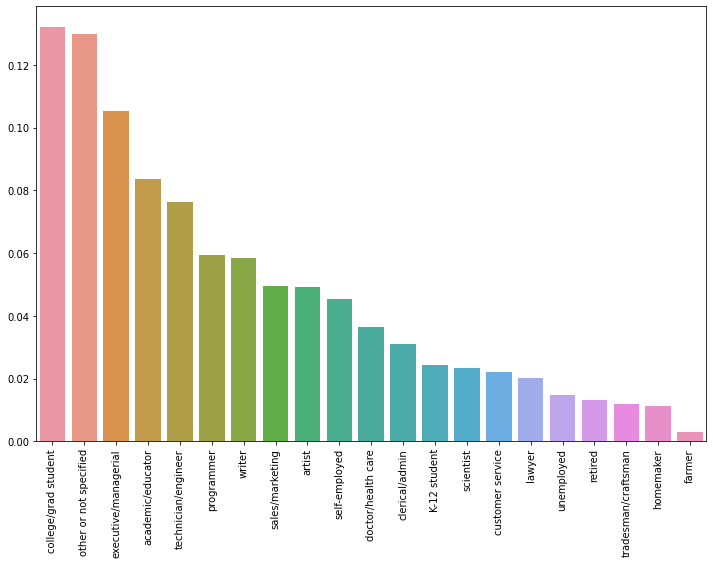

In [25]:
plt.figure(figsize = (12,8))
sns.barplot(user_item_geners['occupation'].value_counts().index,user_item_geners['occupation'].value_counts(normalize=True).values )
plt.xticks(rotation = 90)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


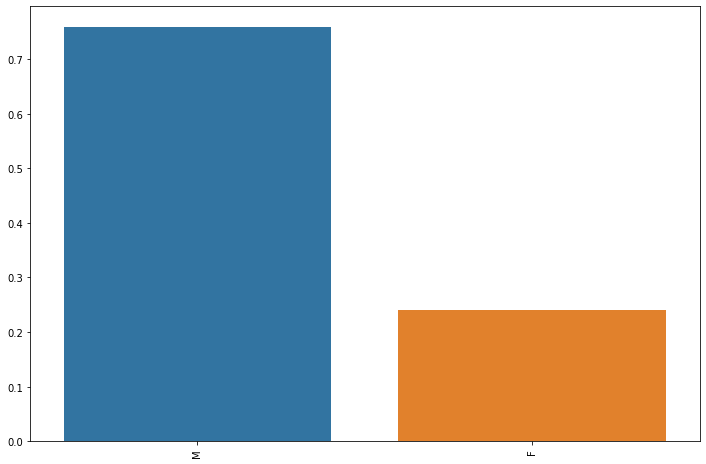

In [26]:
plt.figure(figsize = (12,8))
sns.barplot(user_item_geners['gender'].value_counts().index,user_item_geners['gender'].value_counts(normalize=True).values )
plt.xticks(rotation = 90)
plt.show()

In [27]:
occup = {
 'college/grad student':2 ,
 'other or not specified':2,
 'executive/managerial':2, 
 'academic/educator':2, 
 'technician/engineer':2,
 'programmer':1, 
 'writer':1, 
 'sales/marketing':1, 
 'artist':1, 
 'self-employed':1,
 'doctor/health care':1, 
 'clerical/admin':1, 
 'K-12 student':1, 
 'scientist':0,
 'customer service':0, 
 'lawyer':0, 
 'unemployed':0, 
 'retired':0,
 'tradesman/craftsman':0, 
 'homemaker':0, 
 'farmer':0}

age = {
     "Under 18":18,    
     "18-24":24,
     "25-34":34,
     "35-44":44,
     "45-49":49,
     "50-55":55,
     "56+":56 
     }

In [28]:
user_item_geners['occupation'] = user_item_geners['occupation'].map(occup)
user_item_geners['gender'] = user_item_geners['gender'].map({'M':1, 'F':0})
user_item_geners['age'] = user_item_geners['age'].map(age)

user_item_movies['occupation'] = user_item_movies['occupation'].map(occup)
user_item_movies['gender'] = user_item_movies['gender'].map({'M':1, 'F':0})
user_item_movies['age'] = user_item_movies['age'].map(age)

In [29]:
user_item_movies.drop('zip_code',axis=1,inplace=True)
user_item_geners.drop('zip_code',axis=1,inplace=True)

In [30]:
user_item_geners.rename(columns = {'user_id' : 'UserId', 'movie_id':'ItemId', 'rating': 'Rating'},inplace=True)
user_item_movies.rename(columns = {'user_id' : 'UserId'},inplace=True)

In [31]:
user_item_geners = user_item_geners[['ItemId', 'UserId','release_year', 'gender', 'age', 'occupation',
       'Rating', 'hour', 'avg_ratings', 'other', 'action', 'adventure',
       'animation', 'children', 'comedy', 'crime', 'documentary', 'drama',
       'fantasy', 'film-noir', 'horror', 'musical', 'mystery', 'romance',
       'sci-fi', 'thriller', 'western']]

In [32]:
display(user_item_geners.head(3))
display(user_item_movies.head(3))

ItemId  UserId  release_year  gender  age  occupation  Rating  hour  \
0       1       1        1995.0       0   18           1       5    23   
1       1       6        1995.0       0   55           0       4     4   
2       1       8        1995.0       1   34           1       4     3   

   avg_ratings  other  action  adventure  animation  children  comedy  crime  \
0         4.19      0       0          0          1         1       1      0   
1         3.90      0       0          0          1         1       1      0   
2         3.88      0       0          0          1         1       1      0   

   documentary  drama  fantasy  film-noir  horror  musical  mystery  romance  \
0            0      0        0          0       0        0        0        0   
1            0      0        0          0       0        0        0        0   
2            0      0        0          0       0        0        0        0   

   sci-fi  thriller  western  
0       0         0        0  
1       0         0        0  
2       0         0        0

UserId  gender  age  occupation    1    2    3    4    5    6    7    8  \
0       1       0   18           1  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       2       1   56           1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       3       1   34           0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

     9   10   11   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    24   25   26   27   28   29   30   31   32   33   34   35   36   37   38  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    39   40   41   42   43   44   45   46   47   48   49   50   52   53   54  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    55   56   57   58   59   60   61   62   64   65   66   67   68   69   70  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    71   72   73   74   75   76   77   78   79   80   81   82   83   84   85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    86   87   88   89   90   92   93   94   95   96   97   98   99  100  101  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   102  103  104  105  106  107  108  110  111  112  113  114  116  117  118  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   119  120  121  122  123  124  125  126  127  128  129  130  131  132  133  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   134  135  136  137  138  139  140  141  142  144  145  146  147  148  149  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   150  151  152  153  154  155  156  157  158  159  160  161  162  163  164  \
0  5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   165  166  167  168  169  170  171  172  173  174  175  176  177  178  179  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   180  181  182  183  184  185  186  187  188  189  190  191  192  193  194  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

In [ ]:
user_movie_ratings = 

## 2.3 EDA

In [ ]:
def kde_boxplot(data, x, font_size, target=None):
    plt.figure(figsize = (20,7))
    
    plt.subplot(1,2,1)
    sns.kdeplot(data = data,
                x = x,
                hue = target
               )
    if target != None:
        plt.title(label = "Distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    else:
        plt.title(label = "Distribution of "+x, 
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid()
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data,
               x = target,
               y = x)

    if target != None:
        plt.title(label = "Boxplot showing distribution of "+x+" for different "+target,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
        if df_grouped['City'].nunique() > 5:
            plt.xticks(rotation = 75)
    else:
        plt.title(label = "Boxplot showing distribution of "+x,
                 y = -0.2,
                 fontsize = font_size,
                 fontweight = 'bold')
    plt.grid(which='both')
    plt.show()


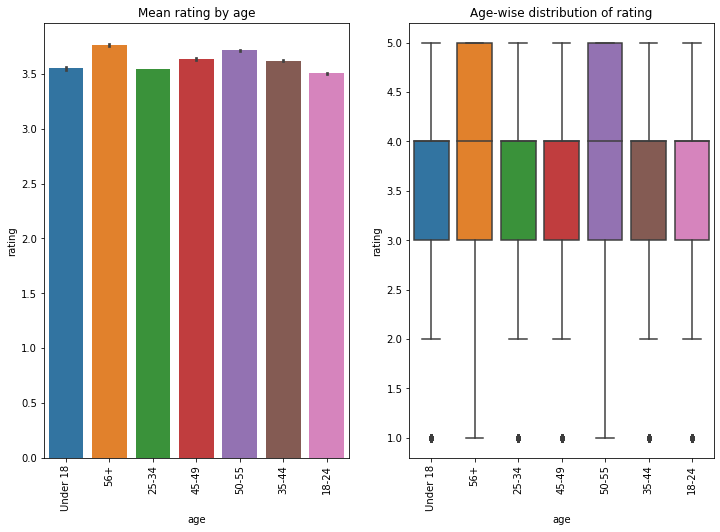

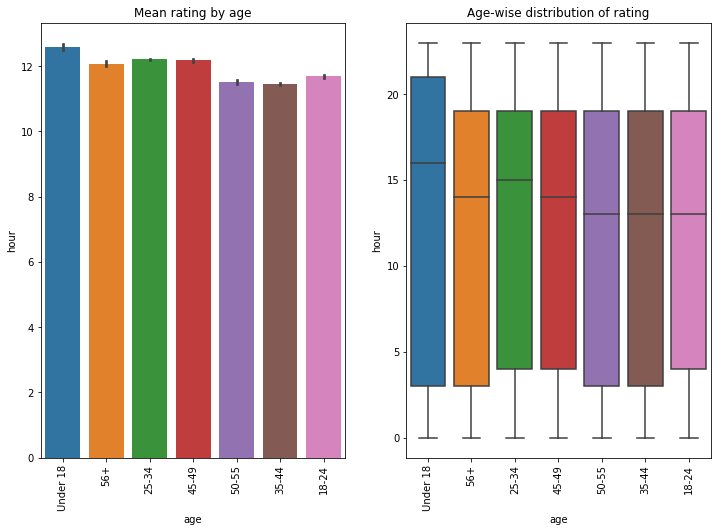

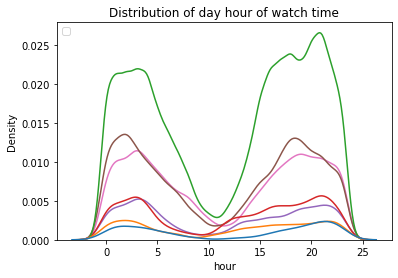

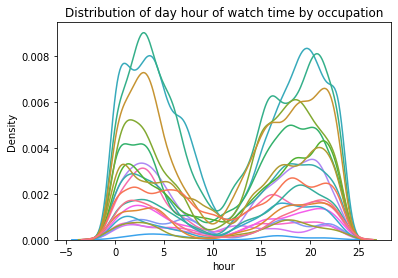

In [ ]:
plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(data=user_ratings, x = 'age', y = 'rating',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean rating by age')

plt.subplot(1,2,2)
sns.boxplot(data=user_ratings, x = 'age',  y= 'rating')
plt.xticks(rotation=90)
plt.title('Age-wise distribution of rating')
plt.show()

plt.figure(figsize = (12,8))
plt.subplot(1,2,1)
sns.barplot(data=user_ratings, x = 'age', y = 'hour',estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Mean rating by age')

plt.subplot(1,2,2)
sns.boxplot(data=user_ratings, x = 'age',  y= 'hour')
plt.xticks(rotation=90)
plt.title('Age-wise distribution of rating')
plt.show()

sns.kdeplot(data=user_ratings, x = 'hour',hue='age')
plt.title('Distribution of day hour of watch time')
plt.legend(loc= 'upper left')
plt.show()

sns.kdeplot(data=user_ratings, x = 'hour',hue='occupation',legend=False)
plt.title('Distribution of day hour of watch time by occupation')
plt.show()

In [ ]:
eda_df = user_ratings.merge(movies_default, on = 'movie_id')
eda_df.head(3)

user_id gender       age     occupation zip_code  movie_id  rating  hour  \
0        1      F  Under 18   K-12 student    48067      1193       5    22   
1        2      M       56+  self-employed    70072      1193       5    21   
2       12      M     25-34     programmer    32793      1193       4    23   

   avg_ratings                                   title geners  release_year  
0         4.19  One Flew Over the Cuckoo's Nest (1975)  drama        1975.0  
1         3.71  One Flew Over the Cuckoo's Nest (1975)  drama        1975.0  
2         3.83  One Flew Over the Cuckoo's Nest (1975)  drama        1975.0

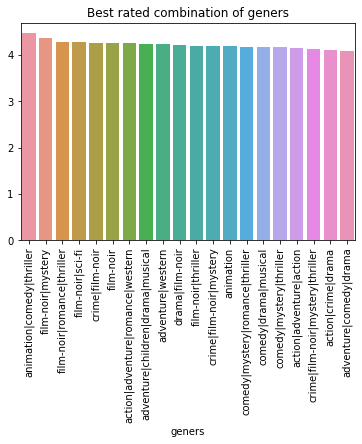

In [ ]:
best_combo_geners = eda_df.groupby('geners')['rating'].mean().sort_values(ascending=False).head(20)
sns.barplot(x = best_combo_geners.index, y = best_combo_geners.values)
plt.title('Best rated combination of geners')
plt.xticks(rotation=90)
plt.show()

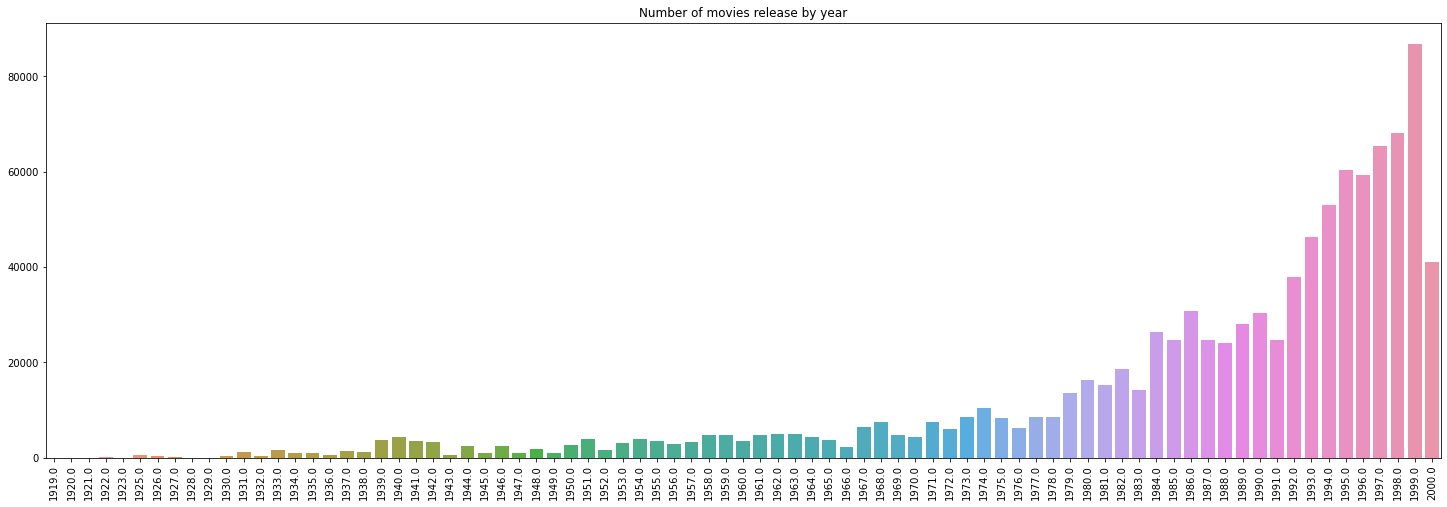

In [ ]:
plt.figure(figsize = (25,8))
sns.barplot(x = eda_df['release_year'].value_counts().index, y = eda_df['release_year'].value_counts().values)
plt.title('Number of movies release by year')
plt.xticks(rotation=90)
plt.show()

## 2.4 Standardizing

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
ss1 = StandardScaler()
ss2 = StandardScaler()

user_item_movies.loc[:,'gender':] = ss1.fit_transform(user_item_movies.loc[:,'gender':])
user_item_geners.loc[:,'release_year': ] = ss2.fit_transform(user_item_geners.loc[:,'release_year':]) 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## 2.4 Insights :     
- There are 3883 total movies with 17 unique genres.
- There are 7 different age groups with 21 unique occupations.
- Based upon the frquency of ratings the occupation and gender has been label encoded, higer the label means higher watch time from that perticular gender and occupation.
- Using pivot table and feature engineering user - user interaction and item - item interaction matrix has been formed.
- It has also been found that mean average rating given by all gender groups is nearly 4.
- There are two time zones present or there are two type of users :     
  * One who watch in the night
  * other who watch in daytime/ evening time.
- Most of the movies were released in 1999 and late 90s.


# 3. Recommendation system based on Pearson Correlation



## 3.1 Recommendation using Pearson Correlation

In [ ]:
def pearson_rec(data,k,movie_id):
    temp = data.T.corr()
    mov = temp.loc[:, movie_id].sort_values(ascending=False)[:k].index
    display(movies_default.loc[movies_default.movie_id.isin(mov)].reset_index(drop=True))

In [ ]:
pearson_rec(geners, 10, 6)

movie_id                            title                           geners  \
0         6                      Heat (1995)            action|crime|thriller   
1       170                   Hackers (1995)            action|crime|thriller   
2       464               Hard Target (1993)  action|adventure|crime|thriller   
3      1953    French Connection, The (1971)      action|crime|drama|thriller   
4      2126                Snake Eyes (1998)    action|crime|mystery|thriller   
5      2278                     Ronin (1998)            action|crime|thriller   
6      2540            Corruptor, The (1999)      action|crime|drama|thriller   
7      2956  Someone to Watch Over Me (1987)            action|crime|thriller   
8      3763                       F/X (1986)            action|crime|thriller   
9      3764                     F/X 2 (1992)            action|crime|thriller   

   release_year  
0        1995.0  
1        1995.0  
2        1993.0  
3        1971.0  
4        1998.0  
5        1998.0  
6        1999.0  
7        1987.0  
8        1986.0  
9        1992.0

## 3.2 Insights
- Using item - item interaction only, a recommendation system is formed using correlation.
- The recommendation can provide movie name as well as movie_id.


# 4. Recommendation system using Cosine Similarity

## 4.1 User user and item item cosine similarity matrix

In [ ]:
cos_similarity_item = pd.DataFrame(data = metrics.pairwise.cosine_similarity(geners),columns = geners.index, index  =geners.index )
display(cos_similarity_item)

movie_id      1         2         3         4         5         6     \
movie_id                                                               
1         1.000000  0.333333  0.408248  0.408248  0.577350  0.000000   
2         0.333333  1.000000  0.000000  0.000000  0.000000  0.000000   
3         0.408248  0.000000  1.000000  0.500000  0.707107  0.000000   
4         0.408248  0.000000  0.500000  1.000000  0.707107  0.000000   
5         0.577350  0.000000  0.707107  0.707107  1.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
3948      0.577350  0.000000  0.707107  0.707107  1.000000  0.000000   
3949      0.000000  0.000000  0.000000  0.707107  0.000000  0.000000   
3950      0.000000  0.000000  0.000000  0.707107  0.000000  0.000000   
3951      0.000000  0.000000  0.000000  0.707107  0.000000  0.000000   
3952      0.000000  0.000000  0.000000  0.500000  0.000000  0.408248   

movie_id      7         8     9         10        11        12        13    \
movie_id                                                                     
1         0.408248  0.408248   0.0  0.000000  0.333333  0.408248  0.816497   
2         0.000000  0.816497   0.0  0.333333  0.000000  0.000000  0.408248   
3         1.000000  0.000000   0.0  0.000000  0.816497  0.500000  0.000000   
4         0.500000  0.000000   0.0  0.000000  0.816497  0.500000  0.000000   
5         0.707107  0.000000   0.0  0.000000  0.577350  0.707107  0.000000   
...            ...       ...   ...       ...       ...       ...       ...   
3948      0.707107  0.000000   0.0  0.000000  0.577350  0.707107  0.000000   
3949      0.000000  0.000000   0.0  0.000000  0.577350  0.000000  0.000000   
3950      0.000000  0.000000   0.0  0.000000  0.577350  0.000000  0.000000   
3951      0.000000  0.000000   0.0  0.000000  0.577350  0.000000  0.000000   
3952      0.000000  0.000000   0.0  0.408248  0.408248  0.000000  0.000000   

movie_id      14        15        16        17        18        19    20    \
movie_id                                                                     
1         0.000000  0.000000  0.000000  0.000000  0.000000  0.577350   0.0   
2         0.000000  0.333333  0.000000  0.000000  0.000000  0.000000   0.0   
3         0.000000  0.408248  0.000000  0.500000  0.000000  0.707107   0.0   
4         0.707107  0.000000  0.500000  0.500000  0.000000  0.707107   0.0   
5         0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   0.0   
...            ...       ...       ...       ...       ...       ...   ...   
3948      0.000000  0.000000  0.000000  0.000000  0.000000  1.000000   0.0   
3949      1.000000  0.000000  0.707107  0.707107  0.000000  0.000000   0.0   
3950      1.000000  0.000000  0.707107  0.707107  0.000000  0.000000   0.0   
3951      1.000000  0.000000  0.707107  0.707107  0.000000  0.000000   0.0   
3952      0.707107  0.000000  1.000000  0.500000  0.707107  0.000000   0.0   

movie_id      21        22        23        24        25        26    \
movie_id                                                               
1         0.333333  0.000000  0.000000  0.000000  0.000000  0.000000   
2         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3         0.408248  0.000000  0.000000  0.000000  0.500000  0.000000   
4         0.816497  0.408248  0.000000  0.500000  0.500000  0.707107   
5         0.577350  0.000000  0.000000  0.000000  0.000000  0.000000   
...            ...       ...       ...       ...       ...       ...   
3948      0.577350  0.000000  0.000000  0.000000  0.000000  0.000000   
3949      0.577350  0.577350  0.000000  0.707107  0.707107  1.000000   
3950      0.577350  0.577350  0.000000  0.707107  0.707107  1.000000   
3951      0.577350  0.577350  0.000000  0.707107  0.707107  1.000000   
3952      0.408248  0.816497  0.707107  0.500000  0.500000  0.707107   

movie_id      27        28        29        30        31        32    \
movie_id                

In [ ]:
cos_similarity_users = pd.DataFrame(data = metrics.pairwise.cosine_similarity(user_item_movies.iloc[:,1:]), index = user_item_movies['UserId'], columns = user_item_movies['UserId'])
display(cos_similarity_users)

UserId      1         2         3         4         5         6         7     \
UserId                                                                         
1       1.000000  0.016778  0.118605  0.221661 -0.015045  0.141986  0.146857   
2       0.016778  1.000000  0.022227  0.091884 -0.020714  0.008973  0.138679   
3       0.118605  0.022227  1.000000  0.264132 -0.027576  0.080283  0.223814   
4       0.221661  0.091884  0.264132  1.000000 -0.016181  0.107972  0.406758   
5      -0.015045 -0.020714 -0.027576 -0.016181  1.000000 -0.021946 -0.000003   
...          ...       ...       ...       ...       ...       ...       ...   
6036   -0.106199 -0.040007 -0.165451 -0.231251  0.063286 -0.093585 -0.218199   
6037   -0.034021  0.015104 -0.054240 -0.026288 -0.014723 -0.036633 -0.041871   
6038    0.165030  0.033836  0.230990  0.418365 -0.016151  0.125852  0.312374   
6039    0.111735 -0.022569  0.011693  0.047587 -0.038209  0.055831  0.010620   
6040   -0.058095  0.015561 -0.067400 -0.092537  0.030314 -0.043652 -0.107731   

UserId      8         9         10        11        12        13        14    \
UserId                                                                         
1       0.066393  0.099417 -0.016369  0.036917  0.161282  0.030129  0.179904   
2       0.026834  0.009658 -0.013571  0.015464  0.027686  0.105112  0.034637   
3      -0.015113  0.042129 -0.095098  0.034837  0.182461  0.128477  0.212493   
4       0.013784  0.096610 -0.193910  0.039045  0.334522  0.118236  0.424901   
5       0.036430  0.032232 -0.049457  0.016843 -0.011715 -0.023680  0.003125   
...          ...       ...       ...       ...       ...       ...       ...   
6036    0.016614 -0.083551  0.062611 -0.039885 -0.163676 -0.085628 -0.193299   
6037   -0.029667 -0.002112 -0.019485 -0.021211 -0.004606 -0.040456 -0.029903   
6038   -0.005766  0.105771 -0.150717  0.038836  0.280329  0.065250  0.351190   
6039   -0.029168 -0.032308  0.088750 -0.016896  0.058223 -0.002035  0.034783   
6040   -0.031340 -0.028236  0.002241 -0.020355 -0.058406 -0.063508 -0.088511   

UserId      15        16        17        18        19        20        21    \
UserId                                                                         
1      -0.052767  0.117340 -0.045810  0.032941 -0.011920  0.167832  0.155168   
2       0.043810 -0.003025 -0.000479  0.009478 -0.016579  0.062488  0.013798   
3       0.031839  0.134506 -0.066175 -0.016683 -0.028198  0.215058  0.160446   
4      -0.050088  0.263766 -0.058258 -0.100913 -0.065652  0.430108  0.287517   
5      -0.006791  0.001295  0.001039 -0.022152 -0.020391  0.003261 -0.003092   
...          ...       ...       ...       ...       ...       ...       ...   
6036   -0.039629 -0.111638  0.072703  0.052107  0.013971 -0.226625 -0.149337   
6037   -0.053445 -0.039658  0.057670 -0.065702 -0.019455 -0.031726 -0.039232   
6038   -0.055839  0.241188 -0.072929 -0.110219 -0.092389  0.344613  0.254358   
6039   -0.072258  0.026511 -0.041184 -0.023606 -0.028833  0.019226  0.030366   
6040   -0.066578 -0.075393  0.025769 -0.024206 -0.021950 -0.090210 -0.070609   

UserId      22        23        24        25        26        27        28    \
UserId                                                                         
1      -0.068287 -0.078894  0.010854  0.057030 -0.058056  0.052599  0.062897   
2       0.003912 -0.037141 -0.014520  0.015926 -0.025082  0.019898  0.025947   
3      -0.044974 -0.097968  0.036484  0.065373 -0.077861  0.089322  0.076157   
4      -0.106740 -0.108535  0.009761  0.151957 -0.124916  0.152075  0.131524   
5      -0.015247  0.007962  0.016620 -0.015209 -0.040349 -0.013934 -0.008558   
...          ...       ...       ...       ...       ...       ...       ...   
6036   -0.018700  0.063870 -0.020926 -0.064134 -0.002656 -0.072279 -0.070329   
6037   -0.032908  0.035634  0.005780 -0.036202 -0.052557  0.108885  0.047256   
6038   -0.098954 -0.100303  0.038914  0.092836 -0.095042  0.130311  0.111383 


## 4.2 Recommendations using Cosine similarity

In [ ]:
def cosine_recommendations(geners, k, entitiy):
    cos = metrics.pairwise.cosine_similarity(geners)
    cos = pd.DataFrame(data=cos, columns = geners.index, index = geners.index)
    rec = (cos.loc[3].sort_values(ascending=False)).index[:k]
    rec = movies_default[movies_default.movie_id.isin(rec)][['title','movie_id','geners']]
    display(rec[['movie_id','title','geners']].reset_index(drop=True))

cosine_recommendations(geners,10,5)

movie_id                              title          geners
0       276                  Milk Money (1994)  comedy|romance
1       287          Nina Takes a Lover (1994)  comedy|romance
2       289                    Only You (1994)  comedy|romance
3       294           Perez Family, The (1995)  comedy|romance
4       295  Pyromaniac's Love Story, A (1995)  comedy|romance
5       752       Vermont Is For Lovers (1992)  comedy|romance
6      1541            Addicted to Love (1997)  comedy|romance
7      1854              Kissing a Fool (1998)  comedy|romance
8      2339  I'll Be Home For Christmas (1998)  comedy|romance
9      3501            Murphy's Romance (1985)  comedy|romance

## 4.3 Insights
- Both user user interaction matrix and item item interaction matrix has been shown above.
- Recommendation system which user item - item similarity is used to provide recommendation.


----
## 5. Recommendation using Nearest Neighbour

## 5.1 Recommendaiton using nearest neighbour : 

In [ ]:
dist = euclidian_distance(user_item_movies.loc[5 ,1:], user_item_movies.iloc[:,1:])
dist.index = dist.index + 1
u = dist.sort_values()[1:5].index
u_mov = ratings[ratings.user_id == 5]['movie_id']
rec_mov_id = (ratings[(ratings['user_id'].isin(u)) & (~ratings['movie_id'].isin(u_mov))].sort_values(by='rating',ascending=False))['movie_id'].values[:5]
display(movies_default[movies_default.movie_id.isin(rec_mov_id)])

movie_id                                       title  \
0            1                            Toy Story (1995)   
1072      1088                        Dirty Dancing (1987)   
1726      1784                   As Good As It Gets (1997)   
2255      2324  Life Is Beautiful (La Vita è bella) (1997)   
3184      3253                        Wayne's World (1992)   

                         geners  release_year  
0     animation|children|comedy        1995.0  
1072            musical|romance        1987.0  
1726               comedy|drama        1997.0  
2255               comedy|drama        1997.0  
3184                     comedy        1992.0

In [ ]:
def euclidian_distance(a,b):
  return (np.sum((a-b)**2,axis=1))**0.5

def NN_rec(user_id, num_mov):
  dist = euclidian_distance(user_item_movies.loc[user_id,1:], user_item_movies.iloc[:,1:])
  dist.index = dist.index + 1
  u = dist.sort_values()[1:5].index
  u_mov = ratings[ratings.user_id == user_id]['movie_id']
  rec_mov_id = (ratings[(~ratings['user_id'].isin(u)) & (~ratings['movie_id'].isin(u_mov))].sort_values(by='rating',ascending=False))['movie_id'].values[:num_mov]
  display(movies_default[movies_default.movie_id.isin(rec_mov_id)])

In [ ]:
NN_rec(5,5)

movie_id                                   title                geners  \
108        110                       Braveheart (1995)  action|drama|western   
551        555                     True Romance (1993)  action|crime|romance   
1176      1193  One Flew Over the Cuckoo's Nest (1975)                 drama   
1373      1394                  Raising Arizona (1987)                comedy   
2302      2371                           Fletch (1985)                comedy   

      release_year  
108         1995.0  
551         1993.0  
1176        1975.0  
1373        1987.0  
2302        1985.0

In [ ]:
eda_df[eda_df.user_id == 5]

user_id gender    age occupation zip_code  movie_id  rating  hour  \
2887          5      M  25-34     writer    55455      3408       3     5   
4203          5      M  25-34     writer    55455      2355       5     5   
11042         5      M  25-34     writer    55455       919       4     5   
19505         5      M  25-34     writer    55455      3105       2     7   
31153         5      M  25-34     writer    55455      1721       1     6   
...         ...    ...    ...        ...      ...       ...     ...   ...   
319592        5      M  25-34     writer    55455      3786       3     5   
319776        5      M  25-34     writer    55455        34       4     6   
321527        5      M  25-34     writer    55455       357       2     6   
322760        5      M  25-34     writer    55455        36       3     6   
323688        5      M  25-34     writer    55455       714       4     6   

        avg_ratings                               title  \
2887           3.15              Erin Brockovich (2000)   
4203           3.15                Bug's Life, A (1998)   
11042          3.15            Wizard of Oz, The (1939)   
19505          3.15                   Awakenings (1990)   
31153          3.15                      Titanic (1997)   
...             ...                                 ...   
319592         3.15        But I'm a Cheerleader (1999)   
319776         3.15                         Babe (1995)   
321527         3.15  Four Weddings and a Funeral (1994)   
322760         3.15             Dead Man Walking (1995)   
323688         3.15                     Dead Man (1995)   

                                  geners  release_year      decade  
2887                               drama        2000.0         90s  
4203           animation|children|comedy        1998.0         90s  
11042   adventure|children|drama|musical        1939.0  before 50s  
19505                              drama        1990.0         80s  
31153                      drama|romance        1997.0         90s  
...                                  ...           ...         ...  
319592                            comedy        1999.0         90s  
319776             children|comedy|drama        1995.0         90s  
321527                    comedy|romance        1994.0         90s  
322760                             drama        1995.0         90s  
323688                           western        1995.0         90s  

[198 rows x 13 columns]

## 5.2 Insights
- This recommendaiton system not just use user-user or item-item but the combination of both, it finds similarity of two users and for our converned user it provides movies that the concerned user has not seen.
- If we observe from above recommendation and users behaviour we can see that the genres are nearly the same (drama, comedy, children animation) hence we are slightly sure our recommendations are working.


---
# 6. Recommendation system based on matrix factorization

In [35]:
pip install cmfrec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 KB 6.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.20-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.0.post1-cp38-cp38-linux_x86_64.whl size=6082762 sha256=312a1890a55d6841a18d00641c7ad4771d2cdf6f04c3f1e522616e03abfb2580
  Stored in directory: /root/.cache/pip/wheels/08/6b/25/1ebcd3aad4d02fb6f68d9b045cf9bb019d0d94c261eb8c6758
Successfully built cmfrec


In [36]:
from cmfrec import CMF

In [37]:
model = CMF(k=7, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
model.fit(user_item_geners)

Collective matrix factorization model
(explicit-feedback variant)


In [ ]:
print(f"A has {model.A_.shape[0]} row and {model.A_.shape[1]} columns")
print(f"B has {model.B_.shape[0]} row and {model.B_.shape[1]} columns")

A has 6040 row and 7 columns
B has 3682 row and 7 columns


In [ ]:
top_items = model.topN(user=5, n=10)
movies_default.loc[movies_default.movie_id.isin(top_items)]

movie_id                                              title  \
330        334                        Vanya on 42nd Street (1994)   
664        670             World of Apu, The (Apur Sansar) (1959)   
1240      1260                                           M (1931)   
1241      1261                 Evil Dead II (Dead By Dawn) (1987)   
1327      1348  Nosferatu (Nosferatu, eine Symphonie des Graue...   
1535      1575                                      Gabbeh (1996)   
2443      2512  Ballad of Narayama, The (Narayama Bushiko) (1982)   
2770      2839                 West Beirut (West Beyrouth) (1998)   
2953      3022                                General, The (1927)   
3065      3134        Grand Illusion (Grande illusion, La) (1937)   

                              geners  release_year  
330                            drama        1994.0  
664                            drama        1959.0  
1240        crime|film-noir|thriller        1931.0  
1241  action|adventure|comedy|horror        1987.0  
1327                          horror        1922.0  
1535                           drama        1996.0  
2443                           drama        1982.0  
2770                           drama        1998.0  
2953                          comedy        1927.0  
3065                   drama|western        1937.0

In [56]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
rm__ = np.dot(model.A_, model.B_.T) + model.glob_mean_
print(f"RMSE for the model is {(mse(user_item.values[user_item > 0], rm__[user_item > 0])**0.5).round(2)}")
print(f"MAPE of the model is {(mape(user_item.values[user_item > 0], rm__[user_item > 0])).round(2)}")


RMSE for the model is 3.88
MAPE of the model is 1.08


In [52]:
user_item.values[user_item > 0].shape

(996144,)

In [50]:
rm__[user_item > 0].shape

(996144,)

---
# 7. Final Insights and Recommendations

## 7.1 Insights 

1. Different recommendations can be used at different instance according to users state of website/application
  - In home page we can provide recommendations using collaborative matrix factorization.
  - If someone is browsing genres then we can use either cosine similarity or correlation similarity recommendations 
  - If the users is a frequent user then we can provide recommendations using Nearest Neighbour recommendations

2. There are either two time zones present or users do watch shows at night rather that day or evening time, using this a more concentrated recommenation system can be created.

## 7.2 Recommendations 
1. Different models should be used at different instances.
2. For users who spend alot of time (eg. Students), a different recommendation system can be built for them saperately alltogather.
3. To capitalize more, we can find users with more than 90 percentile of watch time and show them more adds.


# 8.Questionnaire:
1. Users of which age group have watched and rated the most number of movies?



In [ ]:
eda_df['age'].value_counts().index[0]

'25-34'


2. Users belonging to which profession have watched and rated the most movies?



In [ ]:
eda_df['occupation'].value_counts().index[0]

'college/grad student'

3. Most of the users in our dataset who’ve rated the movies are Male. (T/F)



In [ ]:
eda_df['gender'].value_counts().index[0]

'M'

4. Most of the movies present in our dataset were released in which decade?
    1. 70s b. 90s c. 50s d.80s


In [ ]:
eda_df['release_year'].min()

1919.0

In [ ]:
eda_df['decade'] = pd.cut(eda_df['release_year'], [1919, 1950, 1960, 1970, 1980, 1990, 2000, 2010], labels = ['before 50s', '50s', '60s', '70s', '80s', '90s', '2000+'])
eda_df['decade'].value_counts().index[0]

'90s'


5. The movie with maximum no. of ratings is ___.

In [ ]:
(eda_df.groupby('title').agg({'rating':"count"}).reset_index().sort_values(by = 'rating', ascending=False)).iloc[0]

title     American Beauty (1999)
rating                      3428
Name: 127, dtype: object

6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.


In [ ]:
movies[movies['title'].str.contains('Liar')]

movie_id                  title  geners  release_year
1455      1485       Liar Liar (1997)  comedy        1997.0
2813      2882  Jakob the Liar (1999)   drama        1999.0

In [ ]:
cosine_recommendations(geners,10,1485)

movie_id                              title          geners
0       276                  Milk Money (1994)  comedy|romance
1       287          Nina Takes a Lover (1994)  comedy|romance
2       289                    Only You (1994)  comedy|romance
3       294           Perez Family, The (1995)  comedy|romance
4       295  Pyromaniac's Love Story, A (1995)  comedy|romance
5       752       Vermont Is For Lovers (1992)  comedy|romance
6      1541            Addicted to Love (1997)  comedy|romance
7      1854              Kissing a Fool (1998)  comedy|romance
8      2339  I'll Be Home For Christmas (1998)  comedy|romance
9      3501            Murphy's Romance (1985)  comedy|romance

In [ ]:
pearson_rec(geners, 10, 1484)

movie_id                          title   geners  release_year
0       652                301, 302 (1995)  mystery        1995.0
1       950           Thin Man, The (1934)  mystery        1934.0
2       977        Moonlight Murder (1936)  mystery        1936.0
3      1065  Woman in Question, The (1950)  mystery        1950.0
4      1464            Lost Highway (1997)  mystery        1997.0
5      1484        Daytrippers, The (1996)  mystery        1996.0
6      2467   Name of the Rose, The (1986)  mystery        1986.0
7      2583        Cookie's Fortune (1999)  mystery        1999.0
8      2945           Mike's Murder (1984)  mystery        1984.0
9      3149                Diamonds (1999)  mystery        1999.0

7. On the basis of approach, Collaborative Filtering methods can be classified into ___-based and ___-based. 
Ans : User, item

8. Pearson Correlation ranges between ___ to ___ whereas, Cosine Similarity belongs to the interval between ___ to ___.
Ans : -1 to 1 and 0 to 1

9. Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.

10. Give the sparse ‘row’ matrix representation for the following dense matrix -

[[1 0]
[3 7]]

In [57]:
print(f"RMSE for the model is {(mse(user_item.values[user_item > 0], rm__[user_item > 0])**0.5).round(2)}")
print(f"MAPE of the model is {(mape(user_item.values[user_item > 0], rm__[user_item > 0])).round(2)}")


from scipy.sparse import coo_matrix
dense_matrix = np.array([[1, 0], [3, 7]])
sparse_matrix = coo_matrix(dense_matrix)
print(sparse_matrix)

RMSE for the model is 3.88
MAPE of the model is 1.08
  (0, 0)	1
  (1, 0)	3
  (1, 1)	7
